## G2M Insight For Cab Investment Firm

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Data Set:

**You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

**Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv – this file includes details of transaction for 2 cab companies

**Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv – this file contains list of US cities, their population and number of cab users

In [94]:
#Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from datetime import date

In [95]:
#Read the files
Cab=pd.read_csv('Cab_Data.csv')
Cities=pd.read_csv('Cities_Data.csv')
Customers=pd.read_csv('Customers_Data.csv')
Transaction=pd.read_csv('Transaction_Data.csv')

In [96]:
#Print first 5 rows of all the datasets
print(Cab.head())
print(Cities.head())
print(Customers.head())
print(Transaction.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
             City  Population   Users
0     NEW YORK NY     8405837  302149
1      CHICAGO IL     1955130  164468
2  LOS ANGELES CA     1595037  144132
3        MIAMI FL     1339155   17675
4  SILICON VALLEY     1177609   27247
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27               

In [97]:
#Replace columns character in all the datasets
Cab.columns=Cab.columns.str.replace(' ','_')
Cities.columns=Cities.columns.str.replace(' ','_')
Customers.columns=Customers.columns.str.replace(' ','_')
Transaction.columns=Transaction.columns.str.replace(' ','_')

In [98]:
#Make lower all the columns name
Cab.columns=Cab.columns.str.lower()
Cities.columns=Cities.columns.str.lower()
Customers.columns=Customers.columns.str.lower()
Transaction.columns=Transaction.columns.str.lower()

In [99]:
#Check Null Values
print('Cab:',Cab.isnull().sum().sum())
print('Cities:',Cities.isnull().sum().sum())
print('Customers:',Customers.isnull().sum().sum())
print('Transaction:',Transaction.isnull().sum().sum())

Cab: 0
Cities: 0
Customers: 0
Transaction: 0


In [100]:
#Check Null Duplicates
print('Cab:',Cab.duplicated().sum())
print('Cities:',Cities.duplicated().sum())
print('Customers:',Customers.duplicated().sum())
print('Transaction:',Transaction.duplicated().sum())

Cab: 0
Cities: 0
Customers: 0
Transaction: 0


## Cab Dataset

In [34]:
Cab.head()

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [35]:
# Let's convert the 'Date of Travel' column to datetime format
Cab['date_of_travel'] = pd.to_datetime(Cab['date_of_travel'], unit='D', origin='1900-01-01')

In [36]:
#Let's 'date of travel' separates to year and months and then delete date of travel

Cab['travel_by_months'] = Cab['date_of_travel'].dt.strftime('%B')
Cab['travel_by_years'] = Cab['date_of_travel'].dt.strftime('%Y')
Cab.drop('date_of_travel', axis =1,inplace =True)

In [37]:
Cab.groupby('travel_by_years')['travel_by_months'].value_counts()

travel_by_years  travel_by_months
2016             December            13765
                 November            13008
                 October             12644
                 September           10821
                 August               9844
                 July                 8247
                 May                  7863
                 June                 7325
                 March                6594
                 April                6230
                 February             5881
                 January              4017
2017             December            16654
                 October             15358
                 November            14972
                 September           12655
                 August              11576
                 July                 9834
                 January              9050
                 May                  8606
                 June                 8108
                 April                7981
                 Mar

In [47]:
#Let's drop year (2019) because it just cover the month of january..This makes us not to get a correct result when we do analaysis 
Cab.drop(Cab[Cab['travel_by_years'] == '2019'].index, inplace=True)

In [48]:
Cab.groupby('travel_by_years')['travel_by_months'].value_counts()

travel_by_years  travel_by_months
2016             December            13765
                 November            13008
                 October             12644
                 September           10821
                 August               9844
                 July                 8247
                 May                  7863
                 June                 7325
                 March                6594
                 April                6230
                 February             5881
                 January              4017
2017             December            16654
                 October             15358
                 November            14972
                 September           12655
                 August              11576
                 July                 9834
                 January              9050
                 May                  8606
                 June                 8108
                 April                7981
                 Mar

In [49]:
#Let's create profit column for our dataset 

Cab["profit"]=Cab["price_charged"]-Cab["cost_of_trip"]

## Cities Dataset

In [13]:
Cities.head()

,city,population,users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


## Customers Dataset

In [14]:
Customers.head()

,customer_id,gender,age,income_(usd/month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [15]:
Customers.dtypes

customer_id            int64
gender                object
age                    int64
income_(usd/month)     int64
dtype: object

In [50]:
# Let's convert gender column to a category datatype

Customers['gender']=Customers['gender'].astype('category')

## Transaction Dataset

In [17]:
Transaction.head()

,transaction_id,customer_id,payment_mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [18]:
Transaction.dtypes

transaction_id     int64
customer_id        int64
payment_mode      object
dtype: object

In [51]:
# Let's convert payment mode column to a category datatype
Transaction['payment_mode']=Transaction['payment_mode'].astype('category')

## Merge all the datasets 

In [52]:
df=Cab.merge(Transaction,on="transaction_id").merge(Customers,on="customer_id",how="left").merge(Cities,on="city",how="left")

## Explorotory Data Analysis (EDA)

In [53]:
df.head()

,transaction_id,company,city,km_travelled,price_charged,cost_of_trip,travel_by_months,travel_by_years,profit,customer_id,payment_mode,gender,age,income_(usd/month),population,users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,January,2016,57.315,29290,Card,Male,28,10813,814885,24701
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,January,2016,23.666,27703,Card,Male,27,9237,814885,24701
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,January,2016,27.568,28712,Cash,Male,53,11242,814885,24701
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,January,2016,25.798,28020,Cash,Male,23,23327,814885,24701
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,January,2016,16.844,27182,Card,Male,33,8536,814885,24701


In [267]:
df.tail()

,transaction_id,company,city,km_travelled,price_charged,cost_of_trip,travel_by_months,travel_by_years,profit,customer_id,payment_mode,gender,age,income_(usd/month),population,users
358874,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,January,2018,5.8800,52392,Cash,Male,24,15651,418859,127001
358875,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,January,2018,6.9020,53286,Cash,Male,32,6528,418859,127001
358876,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,January,2018,87.4200,52265,Cash,Male,56,7966,418859,127001
358877,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,January,2018,32.1420,52175,Card,Male,32,6423,418859,127001
358878,10440107,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,January,2018,13.9608,52917,Card,Male,20,11284,418859,127001


In [54]:
df.columns

Index(['transaction_id', 'company', 'city', 'km_travelled', 'price_charged',
       'cost_of_trip', 'travel_by_months', 'travel_by_years', 'profit',
       'customer_id', 'payment_mode', 'gender', 'age', 'income_(usd/month)',
       'population', 'users'],
      dtype='object')

In [43]:
df.shape

(359392, 16)

In [55]:
df.dtypes

transaction_id           int64
company                 object
city                    object
km_travelled           float64
price_charged          float64
cost_of_trip           float64
travel_by_months        object
travel_by_years         object
profit                 float64
customer_id              int64
payment_mode          category
gender                category
age                      int64
income_(usd/month)       int64
population               int64
users                    int64
dtype: object

In [45]:
df.isnull().sum()

transaction_id        0
company               0
city                  0
km_travelled          0
price_charged         0
cost_of_trip          0
travel_by_months      0
travel_by_years       0
profit                0
customer_id           0
payment_mode          0
gender                0
age                   0
income_(usd/month)    0
population            0
users                 0
dtype: int64

In [57]:
df.duplicated().sum()

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358879 entries, 0 to 358878
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   transaction_id      358879 non-null  int64   
 1   company             358879 non-null  object  
 2   city                358879 non-null  object  
 3   km_travelled        358879 non-null  float64 
 4   price_charged       358879 non-null  float64 
 5   cost_of_trip        358879 non-null  float64 
 6   travel_by_months    358879 non-null  object  
 7   travel_by_years     358879 non-null  object  
 8   profit              358879 non-null  float64 
 9   customer_id         358879 non-null  int64   
 10  payment_mode        358879 non-null  category
 11  gender              358879 non-null  category
 12  age                 358879 non-null  int64   
 13  income_(usd/month)  358879 non-null  int64   
 14  population          358879 non-null  int64   
 15  users            

## Let's visualize the dataset to understand it clearly

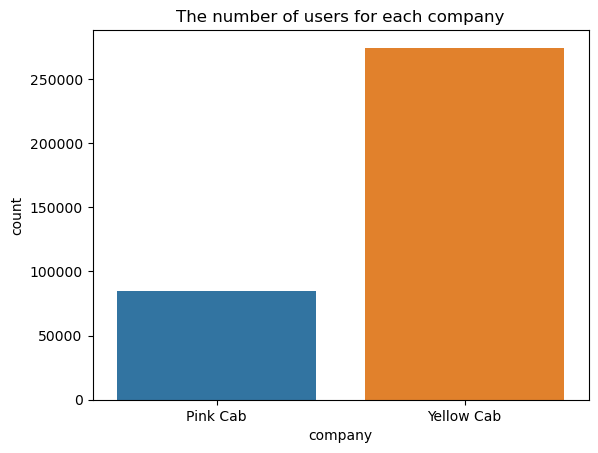

In [59]:
#Let's find which company has more users
sns.countplot(x='company',data=df)
plt.title('The number of users for each company')
plt.show()

Yellow Cab has more customers than Pink Cab

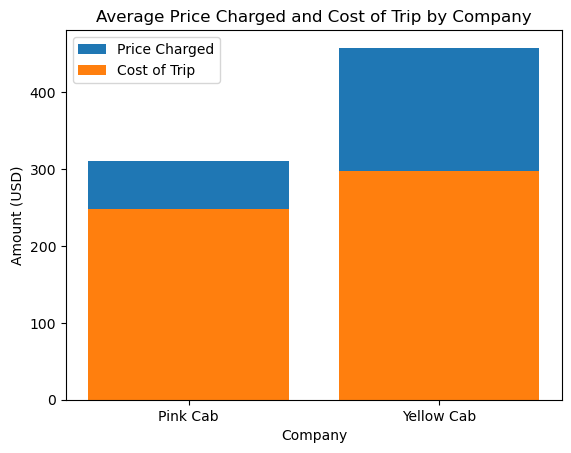

In [60]:
#Average Price Charged and Cost of Trip for each company
pink_mean_price = df[df['company'] == 'Pink Cab']['price_charged'].mean()
pink_mean_cost = df[df['company'] == 'Pink Cab']['cost_of_trip'].mean()
yellow_mean_price = df[df['company'] == 'Yellow Cab']['price_charged'].mean()
yellow_mean_cost = df[df['company'] == 'Yellow Cab']['cost_of_trip'].mean()

fig, ax = plt.subplots()
ax.bar(['Pink Cab', 'Yellow Cab'], [pink_mean_price, yellow_mean_price], label='Price Charged')
ax.bar(['Pink Cab', 'Yellow Cab'], [pink_mean_cost, yellow_mean_cost], label='Cost of Trip')
ax.set_xlabel('Company')
ax.set_ylabel('Amount (USD)')
ax.set_title('Average Price Charged and Cost of Trip by Company')
ax.legend()
plt.show()

Average price charged and cost of trip is higher in Yellow cab than Pink Cab

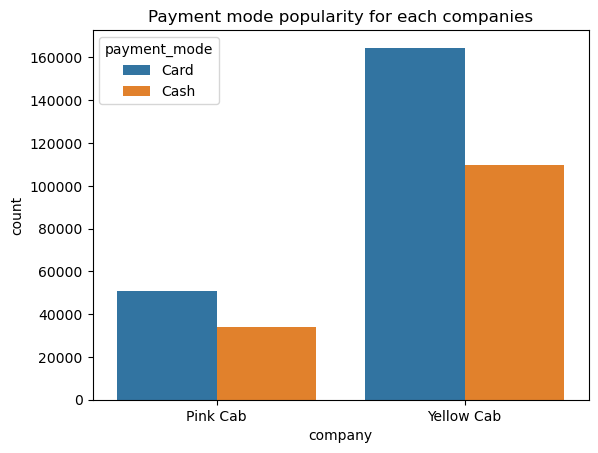

In [61]:
#Which payment mode is more popular for each company
sns.countplot(x='company',hue='payment_mode',data=df)
plt.title('Payment mode popularity for each companies')
plt.show()

It is clearly seen that Card payment mode is more popular in the both companies

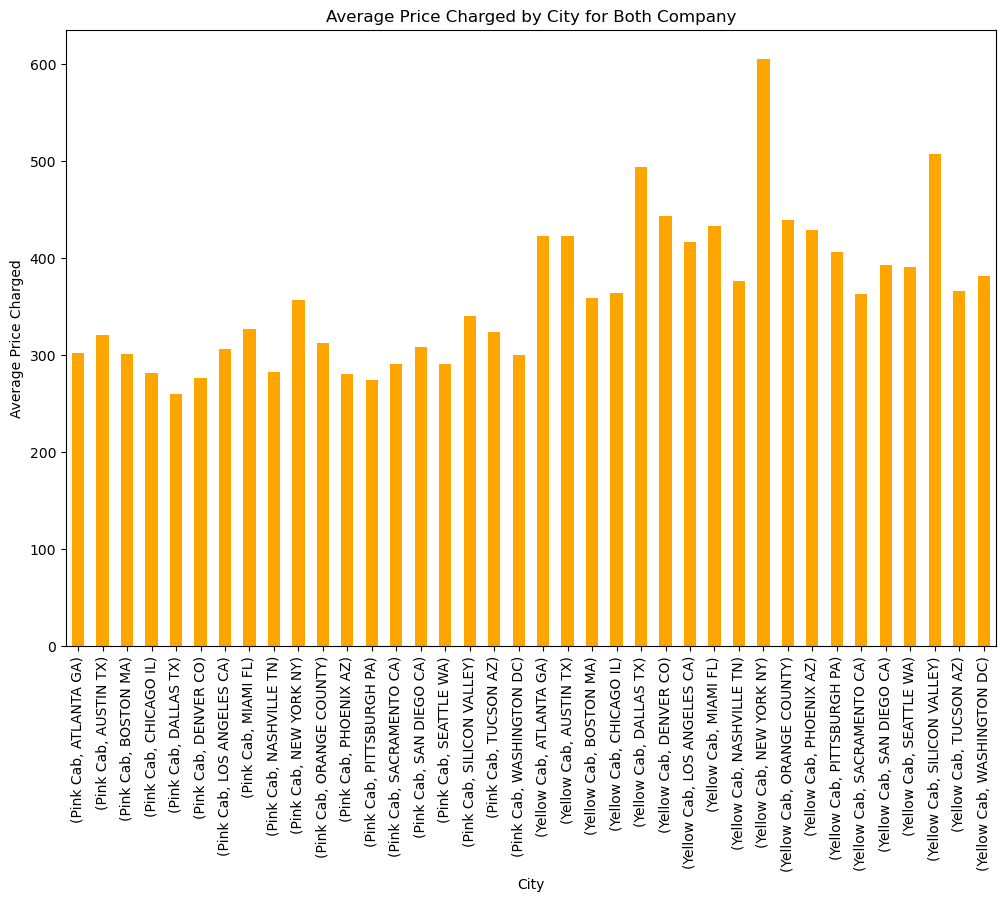

In [62]:
#Average price charged for each cities

# Group the dataframe by City and calculate the average price charged
average_price_by_city = df.groupby(['company','city'])['price_charged'].mean()


plt.figure(figsize=(12,8))
average_price_by_city.plot(kind='bar', color='orange')


plt.title('Average Price Charged by City for Both Company')
plt.xlabel('City')
plt.ylabel('Average Price Charged')
plt.show()

The highest average price is in New York for both company

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9756\3150550083.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["travel_by_years", "company"]).sum()["profit"].unstack().plot(


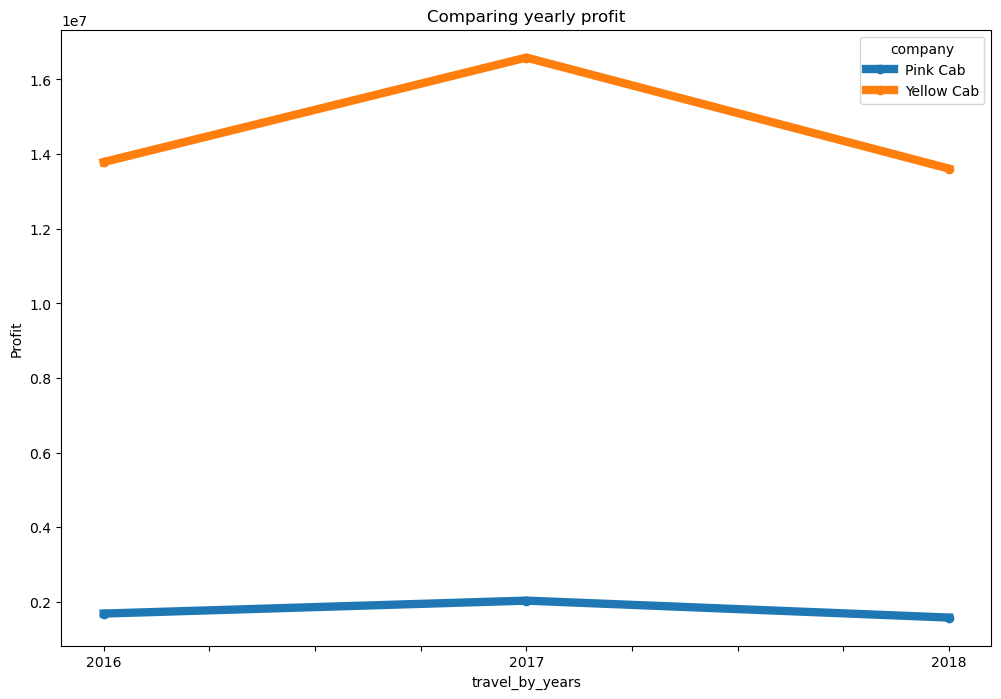

In [77]:
fig, ax = plt.subplots(figsize=(12, 8))

df.groupby(["travel_by_years", "company"]).sum()["profit"].unstack().plot(
    ax=ax, title="Comparing yearly profit", ylabel="Profit", lw=6, marker='o'
)

plt.show()

Yellow Cab has more profit than Pink Cab between 2016 and 2018

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9756\213754352.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["travel_by_months", "company"]).sum()["profit"].unstack().plot(


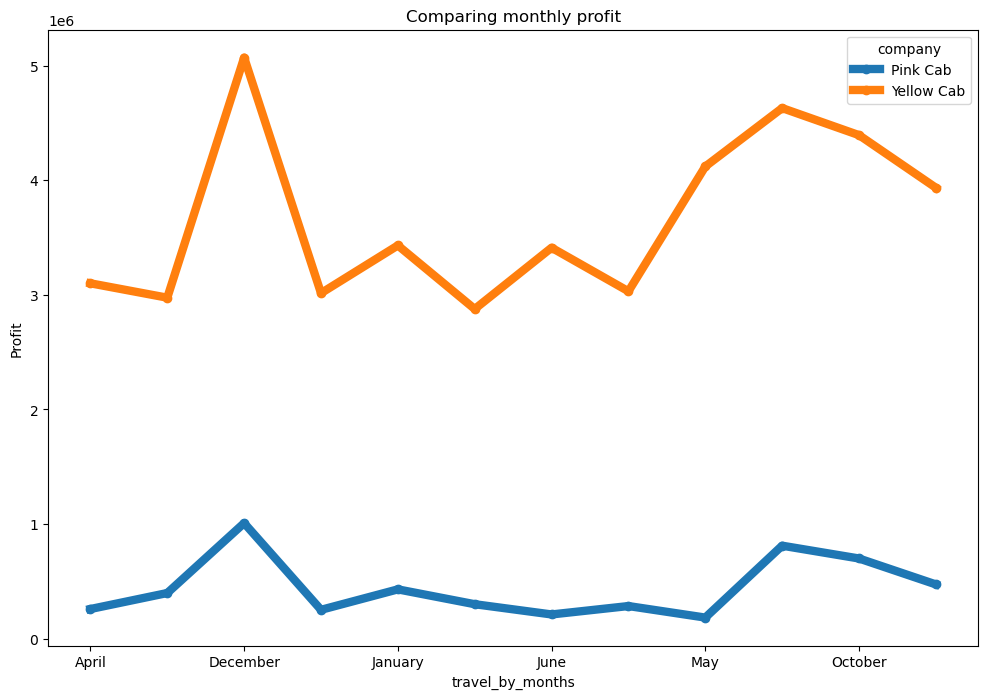

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))

df.groupby(["travel_by_months", "company"]).sum()["profit"].unstack().plot(
    ax=ax, title="Comparing monthly profit", ylabel="Profit", lw=6, marker='o'
)

plt.show()

Both companies have more customers in December

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9756\1080621505.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["age", "company"]).sum()["profit"].unstack().plot(


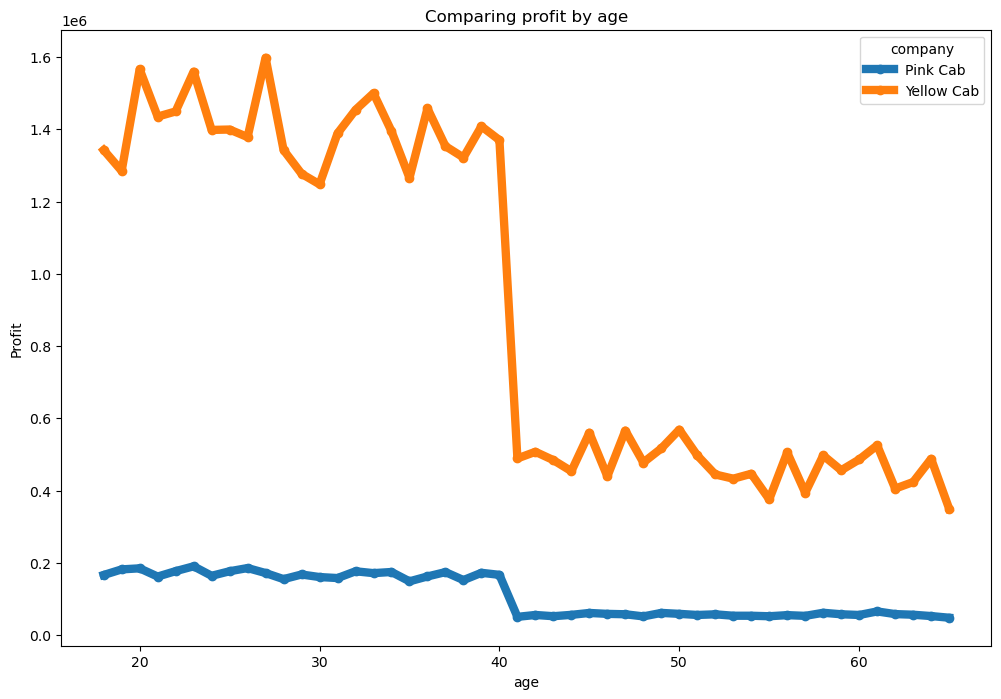

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))

df.groupby(["age", "company"]).sum()["profit"].unstack().plot(
    ax=ax, title="Comparing profit by age", ylabel="Profit", lw=6, marker='o'
)

plt.show()

Customers are not keen on using taxi service who are older than 40 

## In conclusion, we can say the following.

1.Yellow Cab Taxi Company's average price charged and cost of trip is higher than Pink Cab.

2.Customers prefer to card payment model rather than cash.

3.Taxi service price is higher in New York than other cities

4.Yellow Cab monthly and yearly profit are higher than Pink Cab.

5.Yellow Cab has more customers than Pink Cab.


**Based on these data, we can say that the Yellow Cab offers more advantages for investment.**